In [1]:
import my_plotting
import markers
import importlib
import utils
import covax_constants
import CovidVAX_specific_utils
import GeneModules
import better_plotting

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import numpy as np

import warnings
# warnings.simplefilter("ignore")

from functools import partial
import scanpy as sc
import anndata

In [2]:
adata = sc.read_h5ad('CD14-1_1.h5ad')

In [3]:
adata.obs['subsets'] = pd.Categorical('CD14 ' + adata.obs['subsets'].astype(str), categories=['CD14 ISG High', 'CD14 ISG Dim', 'CD14 ISG Low'])

In [4]:
palette = {'CD14 ISG Low': 'sienna', 'CD14 ISG Dim': 'purple', 'CD14 ISG High': 'orange'}

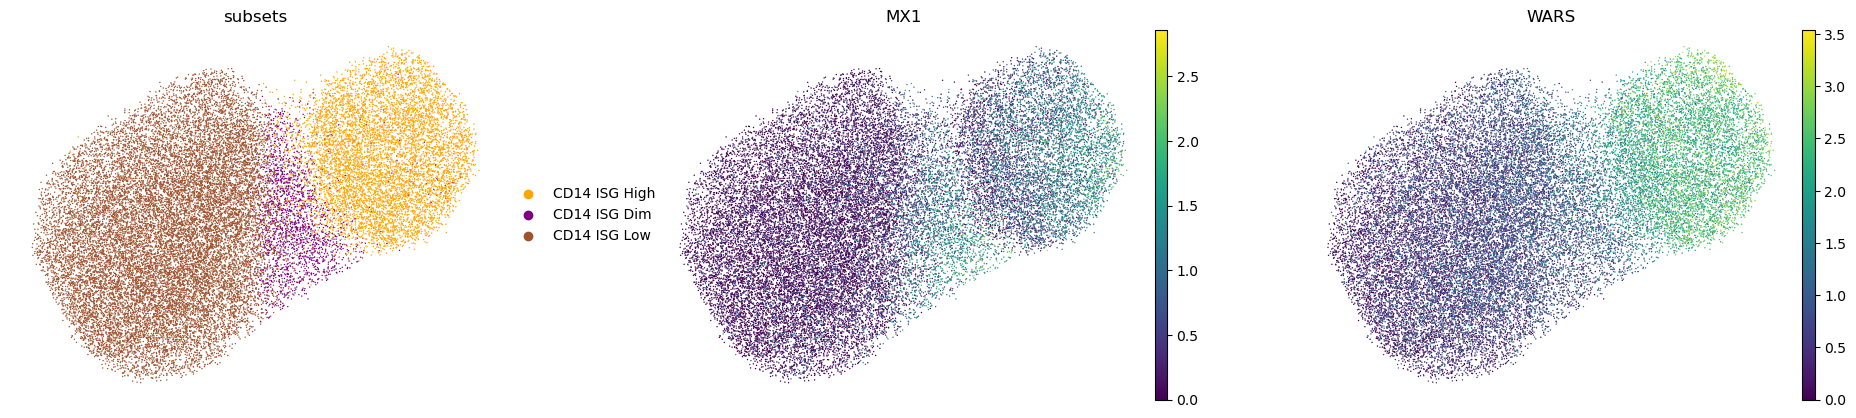

In [5]:
sc.pl.umap(adata, color = ['subsets', 'MX1', 'WARS'], frameon=False, wspace = 0.2, layer='normalized', palette=palette)

In [9]:
inf_genes = GeneModules.InterferonModules.Damiens.all_combined_2021();
inf_genes = [gene for gene in inf_genes if gene in adata.var_names]
adata.obs['IFN Score'] = sc.get.obs_df(adata, inf_genes, use_raw=False, layer='normalized').mean(axis = 1)

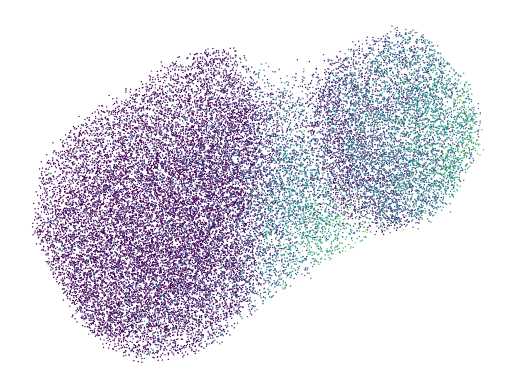

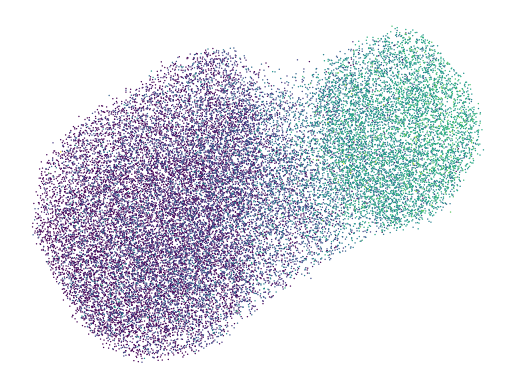

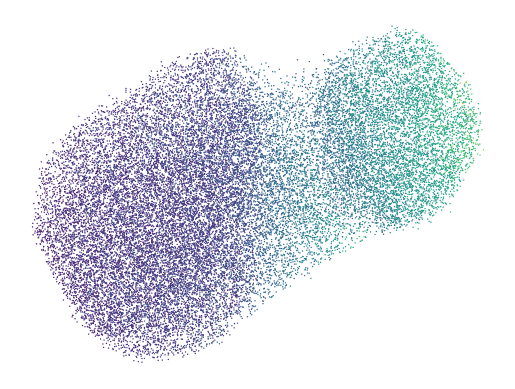

In [10]:
for feature in ['MX1', 'GBP2', 'IFN Score']:
    fig = sc.pl.embedding(adata, color = feature, show=False, frameon=False, 
                          legend_loc=None, colorbar_loc=None, return_fig=True, 
                          layer='normalized', basis=f'X_umap', size = 4)
    
    # my_plotting.savefig_png_eps(fig, f'balis_cd14_mono_featureplot_{feature}', make_folder=True, use_timestamp=False)
    ax = fig.axes[0]
    ax.set_title('');
    plt.show()
    plt.close(fig)

fig = sc.pl.embedding(adata, color = 'subsets', palette=palette, show=False, frameon=False, 
                      legend_loc=None, colorbar_loc=None, return_fig=True, basis=f'X_umap')

# my_plotting.savefig_png_eps(fig, 'balis_cd14_mono_featureplot_subsets', make_folder=True, use_timestamp=False)
ax = fig.axes[0]
ax.set_title('');
plt.close(fig)

/tmp/ipykernel_4107665/2015132385.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
/tmp/ipykernel_4107665/2015132385.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));


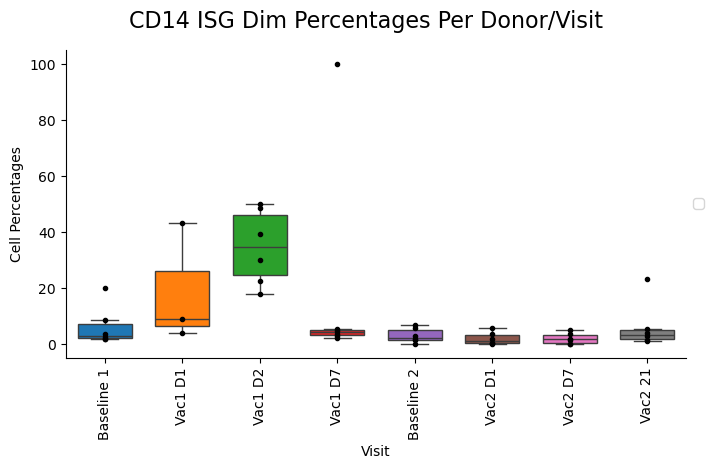

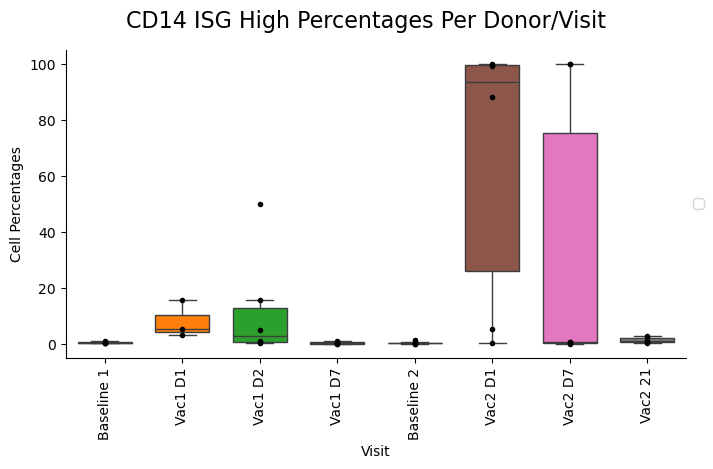

In [6]:
fig = better_plotting.cell_proportions_longitudinal_box_plot_2(adata, 'CD14 ISG Dim', 'subsets');
fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
# my_plotting.savefig_png_eps(fig, 'balis_cd14_long_isg_dim', make_folder=True, use_timestamp=False)


fig = better_plotting.cell_proportions_longitudinal_box_plot_2(adata, 'CD14 ISG High', 'subsets');
fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
# my_plotting.savefig_png_eps(fig, 'balis_cd14_long_isg_high', make_folder=True, use_timestamp=False)

In [10]:
df

,person,Visit,count
0,2047,Baseline 1,2.239642
1,2047,Vac1 D1,3.649635
2,2047,Vac1 D2,29.906542
3,2047,Vac1 D7,3.501094
4,2047,Baseline 2,1.501502
5,2047,Vac2 D1,3.473492
6,2047,Vac2 D7,3.361345
7,2047,Vac2 21,2.597403
8,2049,Baseline 1,3.466205
9,2049,Vac1 D1,42.902208


In [23]:
def calculate_percentages(adata, celltype_name, annots_col, donor_col = 'person', visit_col = 'Visit'):
    df = adata.obs.loc[adata.obs[annots_col] == celltype_name, [donor_col, visit_col]].value_counts()
    df = 100*df/adata.obs[[donor_col, visit_col]].value_counts()
    df = df.fillna(0)
    df = df.reset_index()
    return df
df = calculate_percentages(adata, 'CD14 ISG Dim', 'subsets');
df.pivot(columns = ['Visit'], index = 'person')

count                                                         \
Visit  Baseline 1    Vac1 D1    Vac1 D2     Vac1 D7 Baseline 2   Vac2 D1   
person                                                                     
2047     2.239642   3.649635  29.906542    3.501094   1.501502  3.473492   
2049     3.466205  42.902208  39.116719    4.494382   6.763926  0.151286   
2051     1.612903   8.941878  17.647059    2.031603   2.631579  1.614274   
2052     1.720183        NaN  22.495895    2.821670   1.397713  0.000000   
2053     8.250825        NaN  48.324873    5.109489   5.521472  5.573770   
2055    19.931271        NaN  50.000000  100.000000   0.000000  0.138504   

                             
Visit    Vac2 D7    Vac2 21  
person                       
2047    3.361345   2.597403  
2049    4.872390   5.066667  
2051    1.812191   1.234568  
2052    1.378579   1.094891  
2053    0.000000   3.795620  
2055    0.000000  23.098592

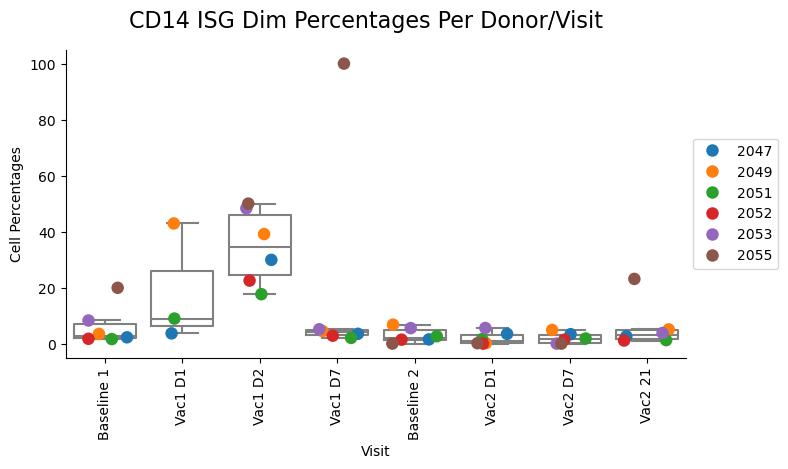

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


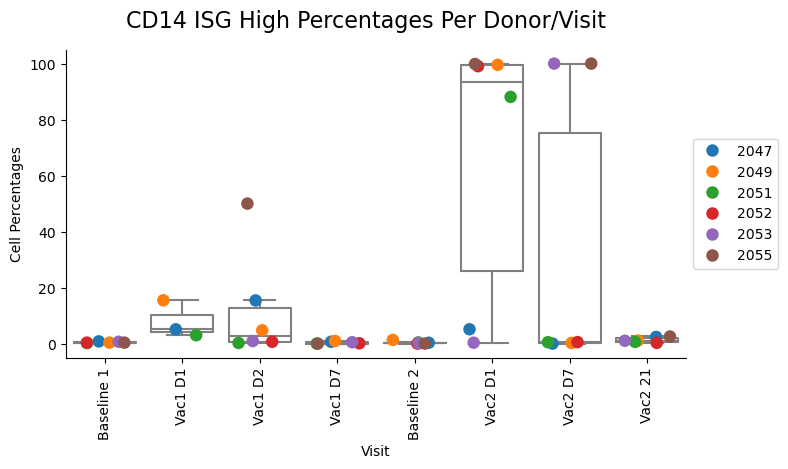

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
fig = better_plotting.cell_proportions_longitudinal_box_plot(adata, 'CD14 ISG Dim', 'subsets');
fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
my_plotting.savefig_png_eps(fig, 'balis_cd14_long_isg_dim_withdonors', make_folder=True, use_timestamp=False)


fig = better_plotting.cell_proportions_longitudinal_box_plot(adata, 'CD14 ISG High', 'subsets');
fig.axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
my_plotting.savefig_png_eps(fig, 'balis_cd14_long_isg_high_withdonors', make_folder=True, use_timestamp=False)

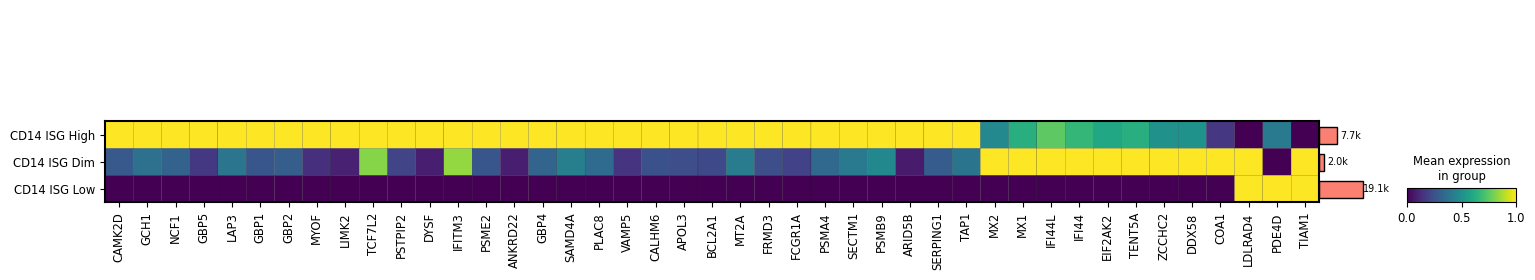

In [65]:
mp = sc.pl.matrixplot(adata, 
              GeneModules.InterferonModules.Manual.CD14_heatmap_24_09_12, 
              groupby = 'subsets', 
              standard_scale = 'var',
              return_fig=True
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
my_plotting.savefig_png_eps(fig, 'balis_cd14_subsets_isg_matrixplot', make_folder=True, use_timestamp=False)

In [11]:
df_ = adata.obs[['subsets', 'Visit']].value_counts().reset_index().pivot(columns = ['Visit'], values = ['count'], index = 'subsets')['count']
df_.index = 'CD14 ' + df_.index.astype(str)
df_['Total'] = df_.sum(axis = 1)
df_.loc['Total', :] = df_.sum(axis = 0)
df_1 = df_.astype(int)
df_1

Visit,Baseline 1,Vac1 D1,Vac1 D2,Vac1 D7,Baseline 2,Vac2 D1,Vac2 D7,Vac2 21,Total
subsets,,,,,,,,,
CD14 CD14 ISG High,18,76,112,11,15,4495,2923,36,7686
CD14 CD14 ISG Dim,172,201,1072,96,122,75,78,155,1971
CD14 CD14 ISG Low,3607,848,1935,2625,3112,1212,2681,3106,19126
Total,3797,1125,3119,2732,3249,5782,5682,3297,28783


# Plot the wide matrix plot from our CD14s

In [4]:
picked = {
	'High Specific' : ['PSMB9', 'FRMD3', 'DYSF', 'CAMK2D', 'SAMD4A', 'SECTM1', 'FARP2', 'NCF1', 'MYOF', 'APOL3', 'LIMK2', 'GBP1', 'WARS', 'GBP5', 'GBP2', 'LAP3', 'GCH1', 'FCGR1A', 'PSTPIP2', 'PSMA4', 'CALHM6', 'TCF7L2', 'ANKRD22', 'GBP4', 'VAMP5', 'PSME2', 'PSMB10', 'ARID5B', 'BCL2A1', 'PLAC8', 'IFITM3', 'MT2A', 'IL31RA'],
	'High and Dim' : ['ISG15', 'EPSTI1', 'DDX60', 'PARP14', 'PARP9', 'IFIH1', 'STAT2', 'TRIM22', 'RNF213', 'SP110', 'TRIM25', 'CD2AP', 'ZC3HAV1', 'IFI16', 'ADAR', 'SMCHD1'],
	'Dim Specific' : ['IFI44', 'MX1', 'MX2', 'ZCCHC2', 'TENT5A', 'EIF2AK2', 'KIAA1958', 'ITSN1', 'IFI44L', 'COA1', 'DDX58', 'HERC5'],
	'Dim and Low' : ['NLRP12', 'TIAM1', 'PITPNC1', 'S100Z', 'LDLRAD4', 'TRERF1', 'ST6GALNAC3', 'SSBP2', 'CSF3R', 'TMEM71', 'CD99', 'TBC1D9', 'F13A1', 'FAM13A', 'FOXO1', 'PECAM1', 'ZFHX3', 'TREM1', 'RFX2', 'FOSL2', 'CLMN', 'SGMS2'],
}

In [5]:
filtered = {}
for key, vals in picked.items():
    filtered[key] = []
    for val in vals:
        if val in adata.var_names:
            filtered[key].append(val)
        else:
            print(val)

FAM13A


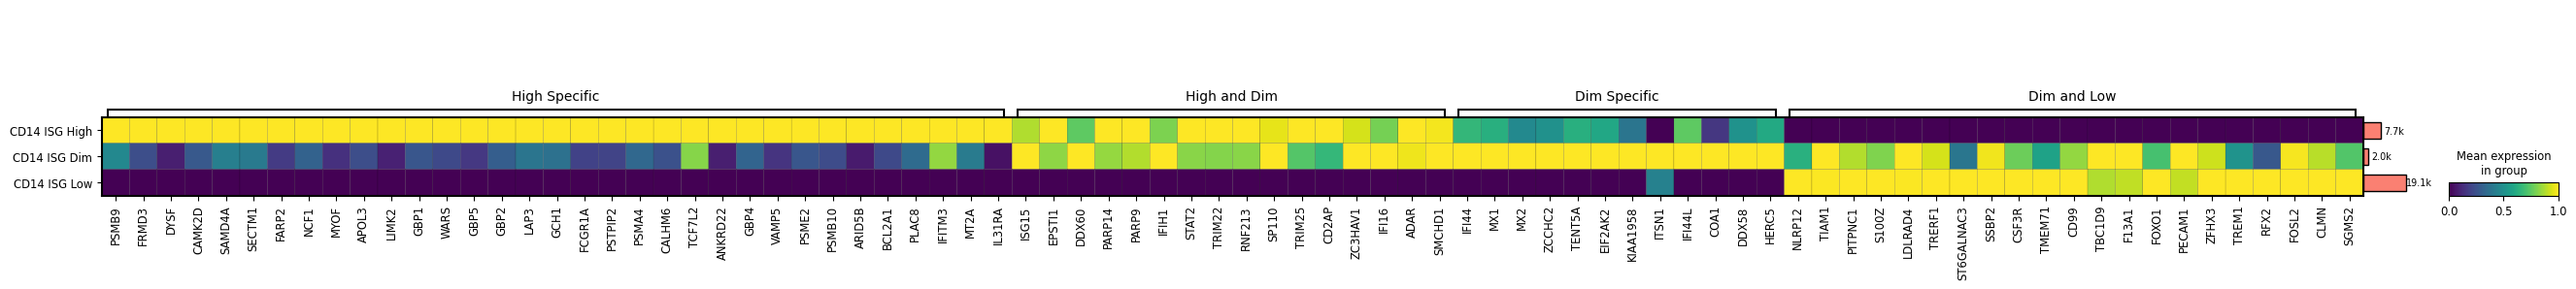

In [6]:
mp = sc.pl.matrixplot(adata, 
              filtered, 
              groupby = 'subsets', 
              standard_scale = 'var',
              return_fig=True,
              var_group_rotation = 0,
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
my_plotting.savefig_png_eps(fig, 'CD14_subsets_isg_matrixplot_2', make_folder=True, use_timestamp=False)

In [15]:
adata.obs['subset_person'] = utils.make_combined_column(adata, columns_list=['subsets', 'person'])

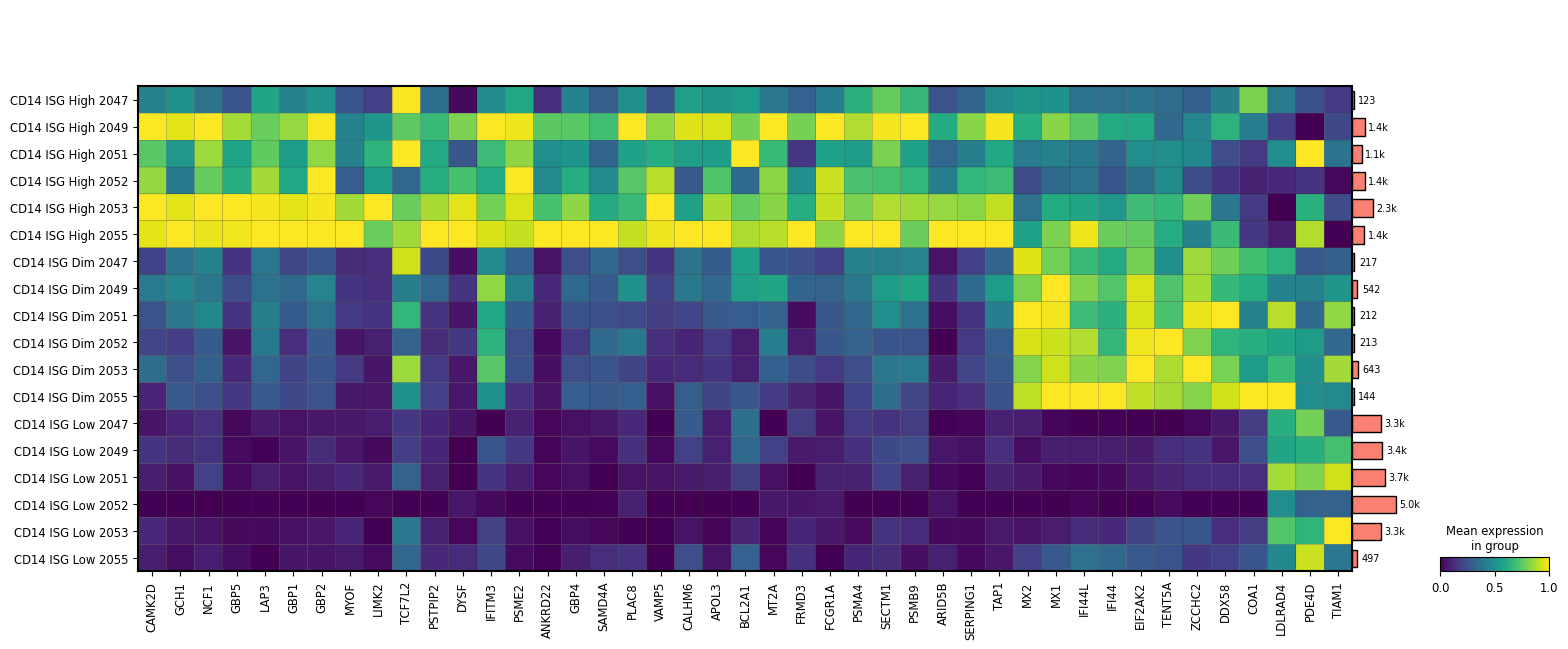

In [16]:
mp = sc.pl.matrixplot(adata, 
              GeneModules.InterferonModules.Manual.CD14_heatmap_24_09_12, 
              groupby = 'subset_person', 
              standard_scale = 'var',
              return_fig=True
             )

mp.add_totals().style(edge_color='black').show()
fig = mp.fig
# my_plotting.savefig_png_eps(fig, 'CD14_subsets_isg_matrixplot_1', make_folder=True, use_timestamp=False)